# DDA3020 HW3 Q2.2


In [111]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture


In [112]:

# 2.2.1 Data Pre-Processing

# Load the dataset
file_path = "D:/mcxiazai/abalone(1).data"
data = pd.read_csv(file_path, delimiter=',')

# Show general information about the data
print("\nData Information:")
data.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   0.455   4176 non-null   float64
 2   0.365   4176 non-null   float64
 3   0.095   4176 non-null   float64
 4   0.514   4176 non-null   float64
 5   0.2245  4176 non-null   float64
 6   0.101   4176 non-null   float64
 7   0.15    4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [113]:

# ii) Assign exact column names to dataframe
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
data.columns = column_names

# Show general information about the data
print("\nData Information:")
data.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [114]:
# iii) Check for missing values
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())



Missing Values in Each Column:
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


In [115]:
#iv Perform one-hot encoding to ’sex’
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='if_binary', sparse_output=False)

# Fit and transform the 'Sex' column
encoded_sex = encoder.fit_transform(data[['Sex']])

# Convert the encoded columns to a DataFrame
encoded_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(['Sex']))

# Concatenate the encoded columns with the original dataframe
df_encoded = pd.concat([data, encoded_df], axis=1)

# Display the first few rows of the updated dataframe
print(df_encoded.head())

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
2   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
3   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
4   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   

   Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0         0.070      7    0.0    0.0    1.0  
1         0.210      9    1.0    0.0    0.0  
2         0.155     10    0.0    0.0    1.0  
3         0.055      7    0.0    1.0    0.0  
4         0.120      8    0.0    1.0    0.0  


In [116]:

# v) Perform min-max normalization on numerical variables (excluding 'Rings')

# Get the numerical columns
numerical_columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
scaler = MinMaxScaler()

# Normalize the numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows of the dataset to verify normalization
print(df_encoded.head())

  Sex    Length  Diameter    Height  Whole weight  Shucked weight  \
0   M  0.371622  0.352941  0.079646      0.079157        0.066241   
1   F  0.614865  0.613445  0.119469      0.239065        0.171822   
2   M  0.493243  0.521008  0.110619      0.182044        0.144250   
3   I  0.344595  0.336134  0.070796      0.071897        0.059516   
4   I  0.472973  0.411765  0.084071      0.123783        0.094149   

   Viscera weight  Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0        0.063199      0.068261      7    0.0    0.0    1.0  
1        0.185648      0.207773      9    1.0    0.0    0.0  
2        0.149440      0.152965     10    0.0    0.0    1.0  
3        0.051350      0.053313      7    0.0    1.0    0.0  
4        0.101382      0.118087      8    0.0    1.0    0.0  


In [117]:

# vi) Transform target variable: ('Rings' + 1.5 = Age) and remove 'Rings'
df_encoded['Age'] = df_encoded['Rings'] + 1.5
df_encoded = df_encoded.drop(columns=['Rings',"Sex"])
df_encoded.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Age
0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.0,0.0,1.0,8.5
1,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,1.0,0.0,0.0,10.5
2,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.0,0.0,1.0,11.5
3,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.0,1.0,0.0,8.5
4,0.472973,0.411765,0.084071,0.123783,0.094149,0.101382,0.118087,0.0,1.0,0.0,9.5


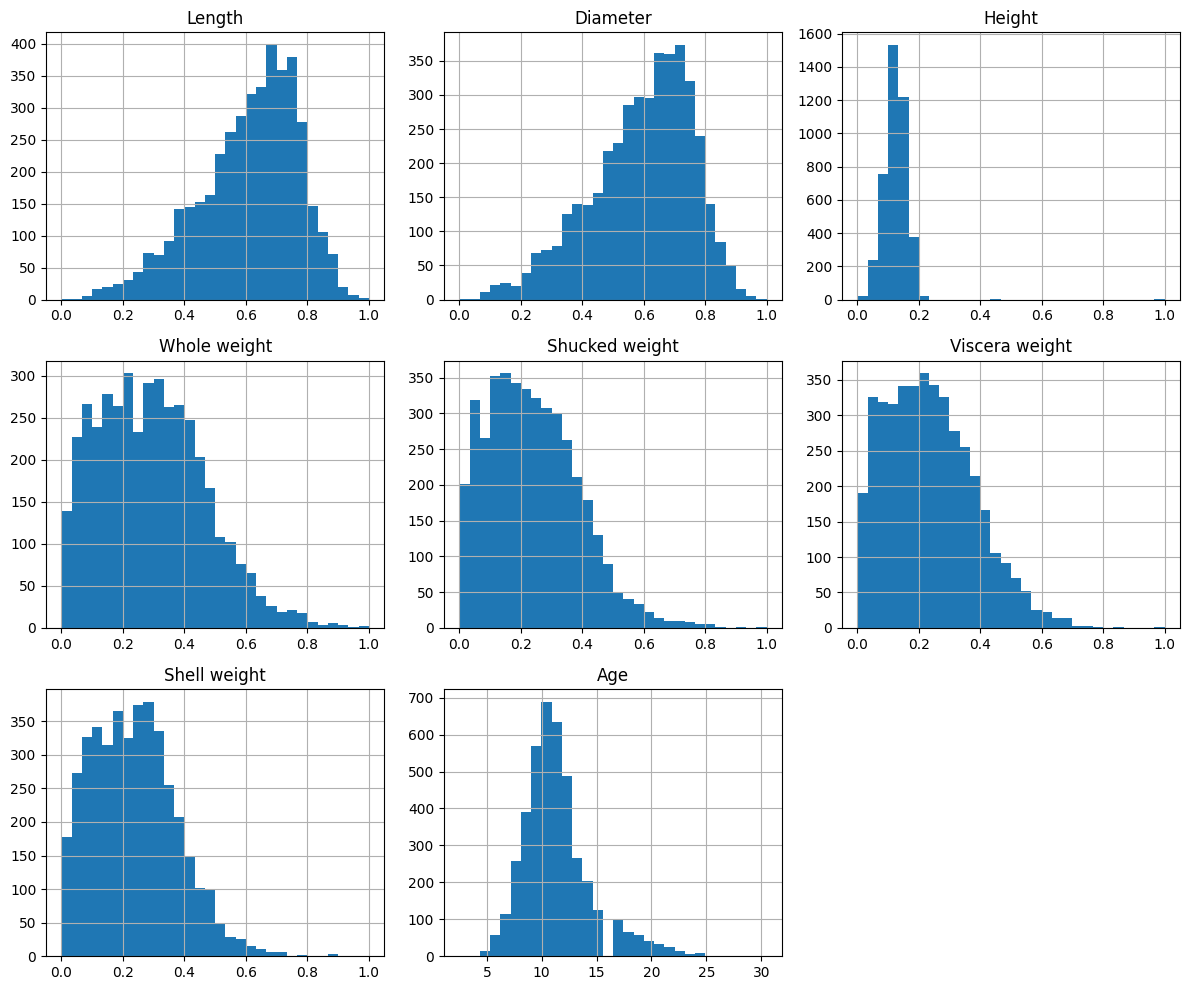

In [118]:

# vii) Plot bar charts for numerical variables
df_encoded[numerical_columns + ['Age']].hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()


In [119]:

# 2.2.2 K-Means Clustering (using sklearn)

# i) Construct model with k=5
# Constract the model with 5 clusters
X = df_encoded[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
          'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M', 'Age']]

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)



KMeans(n_clusters=5, random_state=42)

In [120]:

# ii) Compute and print silhouette coefficients

# Compute the silhouette coefficient
sil_score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Coefficient (K-Means): {sil_score}')

Silhouette Coefficient (K-Means): 0.401351582985128


In [ ]:
# 2.2.3 GMM and EM Algorithms

class ManualGMM:
    def __init__(self, n_components, max_iter=20, random_state=None):
        """
        Initialize GMM parameters
        Args:
            n_components: number of Gaussian components
            max_iter: maximum number of EM iterations
            random_state: random seed for reproducibility
        """
        self.n_components = n_components
        self.max_iter = max_iter
        self.random_state = random_state
        self.means_ = None
        self.covariances_ = None
        self.weights_ = None
    
    def _initialize(self, X):
        """
        Initialize model parameters
        Args:
            X: input data array
        """
        np.random.seed(self.random_state)
        n_samples = len(X)
        
        # Initialize means
        random_indices = np.random.choice(n_samples, self.n_components, replace=False)
        self.means_ = X[random_indices]
        
        # Initialize covariances
        self.covariances_ = np.array([np.var(X) / self.n_components] * self.n_components)
        
        # Initialize weights
        self.weights_ = np.ones(self.n_components) / self.n_components
    
    def _e_step(self, X):
        """
        E-step: compute responsibilities
        Args:
            X: input data array
        Returns:
            resp: responsibilities matrix
        """
        likelihood = np.zeros((len(X), self.n_components))
        
        for k in range(self.n_components):
            likelihood[:, k] = self.weights_[k] * self._multivariate_gaussian(X, self.means_[k], self.covariances_[k])
        
        total_likelihood = np.sum(likelihood, axis=1, keepdims=True)
        return likelihood / total_likelihood
    
    def _m_step(self, X, resp):
        """
        M-step: update parameters
        Args:
            X: input data array
            resp: responsibilities matrix
        """
        n_samples = X.shape[0]
        
        for k in range(self.n_components):
            resp_k = resp[:, k]
            total_resp_k = np.sum(resp_k)
            
            # Update means
            self.means_[k] = np.sum(resp_k * X.ravel()) / total_resp_k
            
            # Update covariances
            diff = X.ravel() - self.means_[k]
            self.covariances_[k] = np.sum(resp_k * (diff ** 2)) / total_resp_k
            
            # Update weights
            self.weights_[k] = total_resp_k / n_samples
    
    def _multivariate_gaussian(self, X, mean, cov):
        
        diff = X - mean
        
        # 确保方差为正数
        if cov < 1e-6:
            cov = 1e-6
        
        # 一维高斯分布公式
        return np.exp(-0.5 * (diff ** 2) / cov) / np.sqrt(2 * np.pi * cov)
    
    def fit(self, X):
        
        # 确保X是一维数组
        X = X.ravel()
        
        self._initialize(X)
        
        # EM迭代
        for _ in range(self.max_iter):
            resp = self._e_step(X)
            self._m_step(X, resp)
        
        return self
    
    def plot_gmm(self, X, title="Gaussian Mixture Model Fitting Result"):
    

        # 创建用于绘图的x轴数据点
        x = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
        
        # 计算每个高斯分量的密度
        gaussians = np.zeros((len(x), self.n_components))
        for k in range(self.n_components):
            gaussians[:, k] = self.weights_[k] * self._multivariate_gaussian(
                x.ravel(), self.means_[k], self.covariances_[k])
        
        # 计算总的密度
        total_density = np.sum(gaussians, axis=1)
        
        # 绘图
        plt.figure(figsize=(10, 6))
        
        # 绘制原始数据的直方图
        plt.hist(X, bins=50, density=True, alpha=0.5, color='gray', label='Data')
        
        # 绘制各个高斯分量
        colors = ['red', 'blue']
        for k in range(self.n_components):
            plt.plot(x, gaussians[:, k], '--', color=colors[k], 
                    label=f'Gaussian {k+1} (w={self.weights_[k]:.2f})')
        
        # 绘制总的密度
        plt.plot(x, total_density, 'g-', linewidth=2, label='Mixture')
        
        plt.title(title)
        plt.xlabel('Whole Weight')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

    
# Test code
whole_weight = df_encoded[['Whole weight']].values

# Fit Manual GMM
manual_gmm = ManualGMM(n_components=2, max_iter=20, random_state=42)
manual_gmm.fit(whole_weight)

# Print results
print("Manual GMM means:\n", manual_gmm.means_)
print("Manual GMM covariances:\n", manual_gmm.covariances_)
print("Manual GMM weights:\n", manual_gmm.weights_)


Manual GMM means:
 [0.43023039 0.20960333]
Manual GMM covariances:
 [0.02512417 0.01485111]
Manual GMM weights:
 [0.37724716 0.62275284]


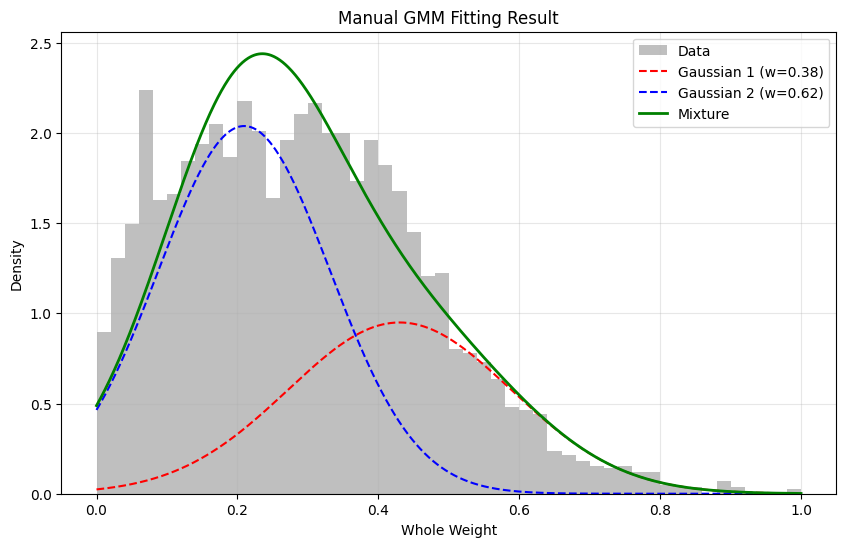

In [122]:
# ii) Plot fitted GMM model

# Prepare data
whole_weight = df_encoded[['Whole weight']].values

# Fit GMM
manual_gmm = ManualGMM(n_components=2, max_iter=20, random_state=42)
manual_gmm.fit(whole_weight)

# Plot the result
manual_gmm.plot_gmm(whole_weight.ravel(), "Manual GMM Fitting Result")



=== sklearn GMM Results ===
Means:
 [0.17378176 0.41827038]
Variances:
 [0.01000419 0.02073544]
Weights:
 [0.51305505 0.48694495]


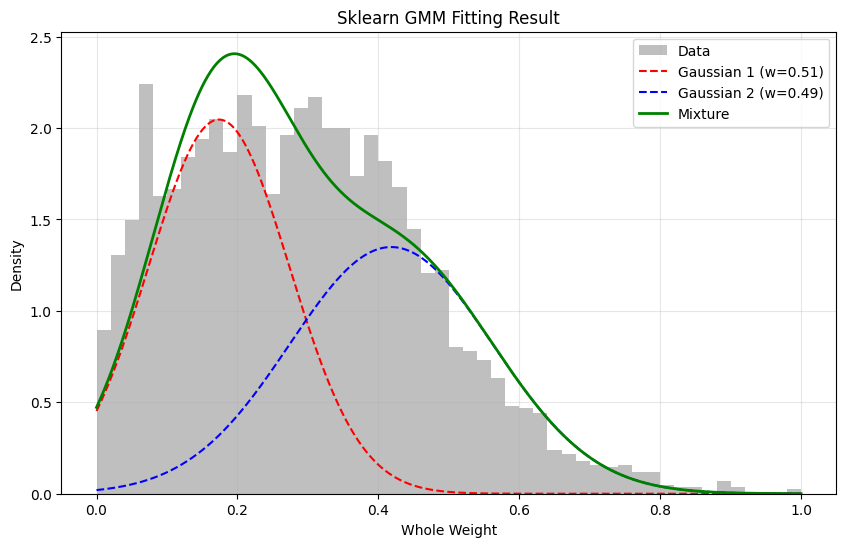

In [123]:
#iii) With the help of sklearn, fit GMM with 2 Gaussians and Plot fitted GMM

def plot_sklearn_gmm(gmm, X, title="Sklearn Gaussian Mixture Model Fitting Result"):
    
    # Create x-axis points for plotting
    x = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    
    # Calculate density for each Gaussian component
    gaussians = np.zeros((len(x), gmm.n_components))
    for k in range(gmm.n_components):
        # Calculate Gaussian distribution for each component
        mean = gmm.means_[k][0]  # Extract scalar value
        var = gmm.covariances_[k][0]  # Extract scalar value
        weight = gmm.weights_[k]
        
        # Calculate Gaussian density
        gaussians[:, k] = weight * (1 / np.sqrt(2 * np.pi * var)) * \
                         np.exp(-0.5 * ((x.ravel() - mean) ** 2) / var)
    
    # Calculate total density
    total_density = np.sum(gaussians, axis=1)
    
    # Create plot
    plt.figure(figsize=(10, 6))
    
    # Plot histogram of original data
    plt.hist(X, bins=50, density=True, alpha=0.5, color='gray', label='Data')
    
    # Plot individual Gaussian components
    colors = ['red', 'blue']
    for k in range(gmm.n_components):
        plt.plot(x, gaussians[:, k], '--', color=colors[k], 
                label=f'Gaussian {k+1} (w={gmm.weights_[k]:.2f})')
    
    # Plot total density
    plt.plot(x, total_density, 'g-', linewidth=2, label='Mixture')
    
    plt.title(title)
    plt.xlabel('Whole Weight')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Example usage
# Prepare data
whole_weight = df_encoded[['Whole weight']].values

# Fit sklearn GMM
sklearn_gmm = GaussianMixture(n_components=2, max_iter=20, random_state=42)
sklearn_gmm.fit(whole_weight)

# Print results
print("\n=== sklearn GMM Results ===")
print("Means:\n", sklearn_gmm.means_.ravel())
print("Variances:\n", sklearn_gmm.covariances_.ravel())
print("Weights:\n", sklearn_gmm.weights_)

# Plot results
plot_sklearn_gmm(sklearn_gmm, whole_weight.ravel(), "Sklearn GMM Fitting Result")

In [129]:

# iv) Fit GMM with all predictors using sklearn
X_all = X.values
gmm_all = GaussianMixture(n_components=2, random_state=42)
gmm_all.fit(X_all)
# Predict the cluster labels
cluster_labels = gmm_all.predict(X_all)
# Print the means and covariances of the GMM with all predictors
print("Means (All predictors):", gmm_all.means_)
print("Covariances (All predictors):", gmm_all.covariances_)
print("Predict the cluster labels:", cluster_labels)

Means (All predictors): [[4.76711074e-01 4.56328175e-01 9.62447038e-02 1.52110366e-01
  1.27868181e-01 1.20510760e-01 1.26244295e-01 7.44601638e-04
  9.99255398e-01 0.00000000e+00 9.39054356e+00]
 [6.68422835e-01 6.57930098e-01 1.36384083e-01 3.59545232e-01
  2.94663291e-01 2.92438153e-01 2.88803167e-01 4.60995411e-01
  0.00000000e+00 5.39004589e-01 1.24004589e+01]]
Covariances (All predictors): [[[ 2.16096748e-02  2.14504559e-02  3.80330046e-03  1.37178081e-02
    1.13904907e-02  1.08637161e-02  1.13011700e-02  2.74031564e-05
   -2.74031564e-05  0.00000000e+00  2.53075638e-01]
  [ 2.14504559e-02  2.18984011e-02  3.85566046e-03  1.38498659e-02
    1.14839465e-02  1.09553102e-02  1.14356520e-02  3.56466905e-05
   -3.56466905e-05  0.00000000e+00  2.58129916e-01]
  [ 3.80330046e-03  3.85566046e-03  1.41012369e-03  2.59475373e-03
    2.14109087e-03  2.05478865e-03  2.11318870e-03  6.72937674e-04
   -6.72937674e-04  0.00000000e+00  5.12010541e-02]
  [ 1.37178081e-02  1.38498659e-02  2.59475

In [ ]:

# v) Compute and print silhouette coefficients for GMM modelled in iii) 
# and compare with K-Means silhouette score

gmm_labels = sklearn_gmm.predict(whole_weight)
sil_score_gmm = silhouette_score(whole_weight, gmm_labels)
print(f'Silhouette Coefficient for GMM: {sil_score_gmm}')

# Use the K-Means silhouette score stored in sil_score
print(f'Silhouette Coefficient for K-Means: {sil_score}')


Silhouette Coefficient for GMM: 0.5814437564240167
Silhouette Coefficient for K-Means: 0.401351582985128


Preference Explanation:

I prefer the GMM clustering method because:
1. It achieved a higher silhouette coefficient, indicating better defined clusters
2. GMM provides a more flexible model by allowing soft assignments and varying cluster shapes
3. For this dataset with potentially overlapping groups, GMM's probabilistic approach is more appropriate than K-means' hard assignments
